In [2]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt 
import os
import random as rd

#Part 1 Random Data Generator

Univariate gaussian data generator

In [11]:
def UGDG(m,v):
    x=0
    for i in range(12):
        x+=rd.uniform(0,1)
    x-=6 # standard normal distribution N(0,1)
    x=m+x*ma.sqrt(v) # from N(0,1) to N(m,v)
    return x

In [ ]:
m=int(input('Mean of the normal distribution:'))
v=int(input('Variance of the normal distribution:'))
print(UGDG(m,v))

Mean of the normal distribution:0
Variance of the normal distribution:1
1.978101154635187


Polynomial basis linear model data generator

In [3]:
def LMDG(n,a,w):
    x=rd.uniform(-1,1)
    P=np.zeros((n,1))
    for i in range(n):
        P[i][0]=x**i
    y=w.transpose()@P+UGDG(0,a)
    return P,(x,y[0][0])

In [ ]:
n=int(input('Parameter n:'))
a=int(input('Parameter a:'))
v=input('Parameter w:')
v=v[1:-1]
v=v.split(',')
w=np.zeros((n,1))
for i in range(n):
    w[i][0]=float(v[i])
P,(x,y)=LMDG(n,a,w)
print(x,y)

Parameter n:3
Parameter a:2
Parameter w:[1,2,3]
-0.47840871127384066 0.6892298774247264


#Part 2 Sequential Estimator

In [ ]:
m=int(input('Mean of the normal distribution:'))
v=int(input('Variance of the normal distribution:'))
mean=0
variance=0
t=0
print('Data point source function: N(%.1f, %.1f)'%(m,v))
print()
while 1:
    x=UGDG(m,v)
    print('Add data point:',x)
    new_mean=(mean*t+x)/(t+1)
    new_variance=((variance+mean**2)*t+x**2)/(t+1)-((mean*t+x)/(t+1))**2
    print('Mean =',new_mean,'Variance =',new_variance)
    t+=1
    if abs(mean-new_mean) < 0.001 and abs(variance-new_variance) < 0.001:
        break
    mean=new_mean
    variance=new_variance
mean=new_mean
variance=new_variance

Mean of the normal distribution:3
Variance of the normal distribution:5
Data point source function: N(3.0, 5.0)

Add data point: -0.28836063313488447
Mean = -0.28836063313488447 Variance = 0.0
Add data point: 2.6641944561529574
Mean = 1.1879169115090364 Variance = 2.1793953888198843
Add data point: 2.3276206630049914
Mean = 1.567818162007688 Variance = 1.741580179474135
Add data point: 5.51716950597935
Mean = 2.5551559980006036 Variance = 4.230693141755122
Add data point: 8.71616385553618
Mean = 3.7873575695077193 Variance = 9.457837364702515
Add data point: 0.3605178563255875
Mean = 3.216217617310697 Variance = 9.51253536223018
Add data point: 2.6732920196990198
Mean = 3.138656817651886 Variance = 8.189695804916727
Add data point: 5.479632924733854
Mean = 3.4312788310371323 Variance = 7.765377328325579
Add data point: 6.5344773211189064
Mean = 3.7760786632684407 Variance = 7.853653019632199
Add data point: 6.848815962405372
Mean = 4.083352393182134 Variance = 7.918042023524638
Add dat

# Matrix_inverse

In [4]:
# LU decomposition
def LU(A,n):
    L=np.zeros((n,n))
    U=np.identity(n) # Diagonal of U is all 1
    for i in range(0,n): # First column of L is A's
        L[i][0]=A[i][0]
    for j in range(1,n): # From assumption, we can obtain the first row of U
        U[0][j]=A[0][j]/L[0][0]
    for i in range(1,n):
        for j in range(1,i+1): # We can use the terms we have known to find other terms.
            s=0
            for k in range(0,j):
                s+=L[i][k]*U[k][j]
            L[i][j]=A[i][j]-s
        for j in range(i+1,n):
            s=0
            for k in range(0,j):
                s+=L[i][k]*U[k][j]
            U[i][j]=(A[i][j]-s)/L[i][i]
    return L,U,L@U

In [5]:
def lin_eq(L,U,b,n): # LUx=b
    y=np.zeros((n,1)) # Ly=b, solve y
    x=np.zeros((n,1)) # Ux=y, solve x
    for i in range(0,n):
        s=0
        for j in range(0,i):
            s+=L[i][j]*y[j][0]
        y[i][0]=(b[i][0]-s)/L[i][i]
    for i in range(0,n):
        r=n-1
        s=0
        for j in range(0,i):
            s+=U[r-i][r-j]*x[r-j][0]
        x[r-i][0]=(y[r-i][0]-s)/U[r-i][r-i]
    return x

In [6]:
def Matrix_inverse(A,n):
    L,U,X=LU(A,n)
    A_inv=np.zeros((n,n))
    for i in range(0,n): # Use Ax=e_i for all i=1~n to obtain A^-1
        b=np.zeros((n,1))
        b[i][0]=1
        x=lin_eq(L,U,b,n)
        for j in range(0,n):
            A_inv[j][i]=x[j][0]
    return A_inv

#Part 3 Baysian Linear regression

In [7]:
def polynomial_coefficients(x,coeffs,order):
    y=np.zeros(len(x))
    for i in range(order):
        y+=coeffs[i][0]*x**i
    return y

In [8]:
def print_graph(coef,a):
    xs=np.linspace(-3,3,100)
    plt.title('Ground truth')
    plt.plot(xs,polynomial_coefficients(xs,coef,n),'k')
    plt.plot(xs,polynomial_coefficients(xs,coef,n)+a,'r')
    plt.plot(xs,polynomial_coefficients(xs,coef,n)-a,'r')
    plt.xlim([-2,2])
    plt.ylim([-15,25])

In [9]:
def print_graph_p(a,mean,variance,X,Y,t): # predicted graph
    xs=np.linspace(-2,2,100)
    Predictive_mean=polynomial_coefficients(xs,mean,n)
    Predictive_variance=np.zeros(100)
    for i in range(100):
        xs_coef=np.zeros(n)
        for j in range(n):
            xs_coef[j]=xs[i]**j
        Predictive_variance[i]=a+xs_coef@variance@xs_coef.transpose()
    if t==10 or t==50:
        plt.title('After %d incomes' %(t))
    else:
        plt.title('Predict result (%d)' %(t))
    plt.plot(xs,Predictive_mean,'k')
    plt.plot(xs,Predictive_mean+Predictive_variance,'r')
    plt.plot(xs,Predictive_mean-Predictive_variance,'r')
    plt.scatter(X,Y,c='b')
    plt.xlim([-2,2])
    plt.ylim([-15,25])

In [12]:
b=int(input('Parameter b:'))
n=int(input('Parameter n:'))
a=int(input('Parameter a:'))
v=input('Parameter w(format:[w0,w1,...,wn-1]):')
v=v[1:-1]
v=v.split(',')
w=np.zeros((n,1))
for i in range(n):
    w[i][0]=float(v[i])
mean=np.zeros((n,1))
variance=1/b*np.identity(n)
Print_X=[]
Print_Y=[]
Print_mean=[]
Print_variance=[]
t=0
while 1:
    P,(x,y)=LMDG(n,a,w) # linear model data generator
    new_Phi=np.zeros((t+1,n)) # t+1 data points and polynomial of order n
    new_X=np.zeros((t+1,1)) # t+1 data points
    new_Y=np.zeros((t+1,1)) # t+1 data points
    for i in range(t):
        new_Phi[i]=Phi[i]
        new_X[i][0]=X[i][0]
        new_Y[i][0]=Y[i][0]
    new_Phi[t]=P.transpose()
    new_X[t][0]=x
    new_Y[t][0]=y
    Lamb=a*new_Phi.transpose()@new_Phi+b*np.identity(n)
    new_mean=Matrix_inverse(Lamb,n)@(a*new_Phi.transpose()@new_Y+variance@mean)
    new_variance=Matrix_inverse(Lamb,n)
    print('Add data point (%f, %f):' %(x,y))
    print()
    print('Postirior mean:',new_mean)
    print('Postirior variance:',new_variance)
    Predictive_mean=new_mean.transpose()@P
    Predictive_variance=1/a+P.transpose()@new_variance@P
    print('Predictive distribution ~ N(%f, %f)' %(Predictive_mean[0][0], Predictive_variance[0][0]))
    print()
    t+=1
    Phi=new_Phi
    X=new_X
    Y=new_Y
    error=0
    for i in range(n):
        error+=(mean[i]-new_mean[i])**2
        for j in range(n):
            error+=(variance[i][j]-new_variance[i][j])**2
    if error < 0.1**(2*n):
        break
    mean=new_mean
    variance=new_variance
    if t==10 or t==50:
        Print_mean.append(mean)
        Print_variance.append(variance)
        Print_X.append(X)
        Print_Y.append(Y)
mean=new_mean
variance=new_variance

Parameter b:1
Parameter n:3
Parameter a:3
Parameter w(format:[w0,w1,...,wn-1]):[1,2,3]
Add data point (-0.353807, -0.838939):

Postirior mean: [[-0.56908746]
 [ 0.20134709]
 [-0.07123799]]
Postirior variance: [[ 0.32165796  0.24000212 -0.08491441]
 [ 0.24000212  0.91508559  0.03004331]
 [-0.08491441  0.03004331  0.98937047]]
Predictive distribution ~ N(-0.649243, 0.591295)

Add data point (-0.450560, -2.650320):

Postirior mean: [[-1.20766593]
 [ 0.72770797]
 [-0.39282868]]
Postirior variance: [[ 0.26004208  0.29217407 -0.11705754]
 [ 0.29217407  0.87091008  0.05725983]
 [-0.11705754  0.05725983  0.97260237]]
Predictive distribution ~ N(-1.615288, 0.488971)

Add data point (-0.549156, 1.308463):

Postirior mean: [[-0.73275043]
 [-0.0534563 ]
 [ 0.27132787]]
Postirior variance: [[ 0.25230167  0.31249959 -0.13449169]
 [ 0.31249959  0.81753736  0.10304012]
 [-0.13449169  0.10304012  0.93333448]]
Predictive distribution ~ N(-0.621570, 0.458595)

Add data point (0.275055, 1.310129):

Postir

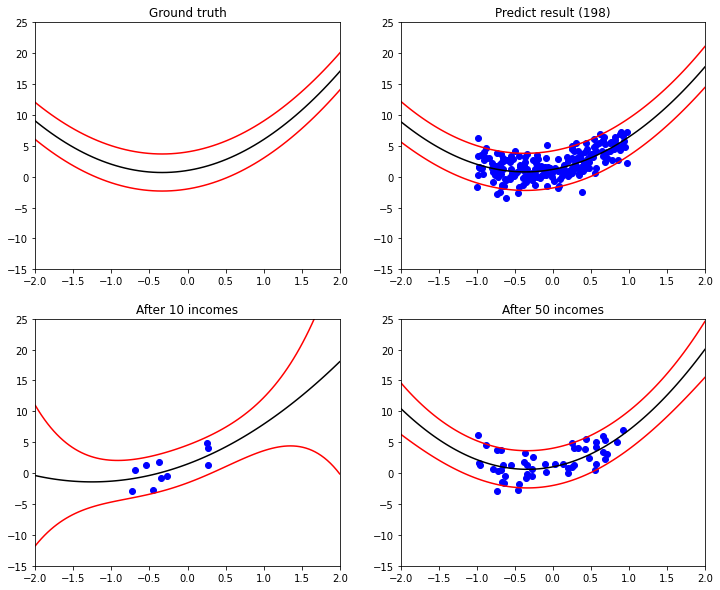

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
print_graph(w,a)
plt.subplot(2,2,2)
print_graph_p(a,mean,variance,X,Y,t)
out=[10,50]
for i in range(2):
    plt.subplot(2,2,i+3)
    print_graph_p(a,Print_mean[i],Print_variance[i],Print_X[i],Print_Y[i],out[i])
plt.show()